In [ ]:
import sympy as sym
import numpy as np
import math

In [ ]:
from sympy import symbols
from sympy.plotting import plot3d
x1, x2 = symbols('x1 x2')


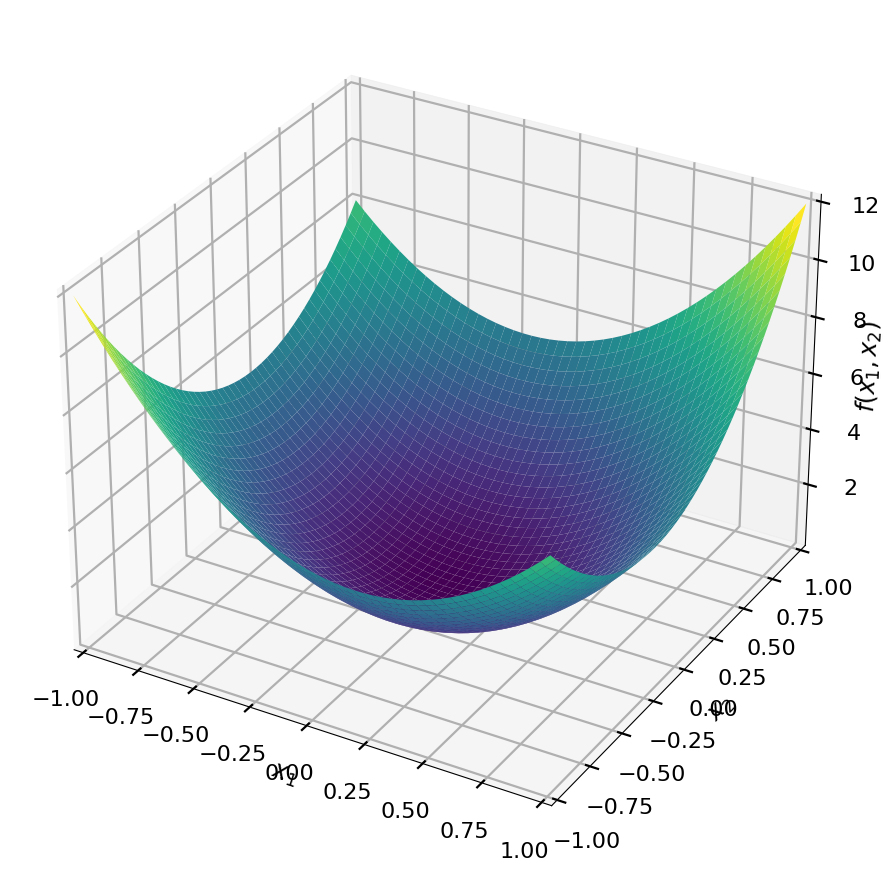

In [ ]:
plot3d((5*x1**2+2*x1*x2+5*x2**2, (x1, -1, 1), (x2, -1, 1)))

In [ ]:
exp1 = sym.diff(5*x1**2+2*x1*x2+5*x2**2,x1)
exp2 = sym.diff(5*x1**2+2*x1*x2+5*x2**2,x2)

In [ ]:
print(exp1.subs([(x1,1),(x2,1)]))
print(exp2.subs([(x1,1),(x2,1)]))
np.array([(exp1.subs([(x1,1),(x2,1)])),exp2.subs([(x1,1),(x2,1)])])

12
12


array([12, 12], dtype=object)

In [ ]:
x_init1 = np.array((100,100,1,1))
lr = 0.001
tol_ = 0.0001
x_m1 = x_init1

In [ ]:
def grad_des2(lr,tol,x_m):
  # print(len(x_m))
  while (math.sqrt((x_m[-4]-x_m[-2])**2 + (x_m[-3]-x_m[-1])**2)>=tol):
    lst = [exp1.subs([(x1,x_m[np.size(x_m)-2]),(x2,x_m[np.size(x_m)-1])]),exp2.subs([(x1,x_m[np.size(x_m)-2]),(x2,x_m[np.size(x_m)-1])])]
    x_2 = np.array((x_m[-2],x_m[-1])) - lr*(np.array(lst))
    x_m = np.append(x_m,x_2)
  return x_m

In [ ]:
x_t = grad_des2(lr,tol_,x_m1)
x_t0 = np.delete(x_t,[0,1])
x_t1 = x_t0.reshape(len(x_t0)//2,2)

In [ ]:
x_t1

array([[1, 1],
       [0.988000000000000, 0.988000000000000],
       [0.976144000000000, 0.976144000000000],
       [0.964430272000000, 0.964430272000000],
       [0.952857108736000, 0.952857108736000],
       [0.941422823431168, 0.941422823431168],
       [0.930125749549994, 0.930125749549994],
       [0.918964240555394, 0.918964240555394],
       [0.907936669668729, 0.907936669668729],
       [0.897041429632705, 0.897041429632705],
       [0.886276932477112, 0.886276932477112],
       [0.875641609287387, 0.875641609287387],
       [0.865133909975938, 0.865133909975938],
       [0.854752303056227, 0.854752303056227],
       [0.844495275419552, 0.844495275419552],
       [0.834361332114517, 0.834361332114517],
       [0.824348996129143, 0.824348996129143],
       [0.814456808175594, 0.814456808175594],
       [0.804683326477486, 0.804683326477486],
       [0.795027126559757, 0.795027126559757],
       [0.785486801041040, 0.785486801041040],
       [0.776060959428547, 0.776060959428547]

In [ ]:
print("The number of iterations = ", len(x_t1))

The number of iterations =  428


In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

<ipython-input-25-b2098eac6dea>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


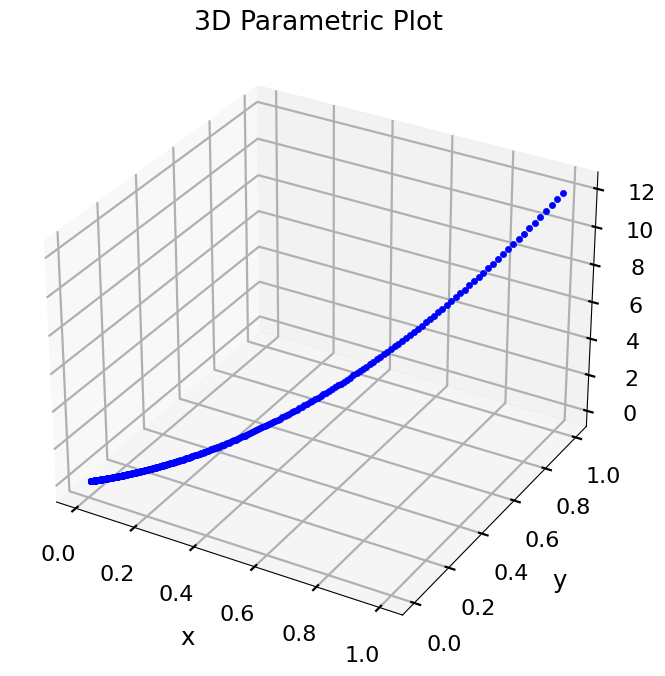

In [ ]:
fig = plt.figure(figsize = (10,8))
ax = plt.axes(projection='3d')
ax.grid()

for i in x_t1:
    x = i[0]
    y = i[1]
    z = 5*x**2+2*x*y+5*y**2
    ax.scatter(x, y, z, c = 'b')
ax.set_title('3D Parametric Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()